In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [164]:
# Loading the breast data from sklearn
cncr = load_breast_cancer()

In [7]:
# The data we have loaded is of the type : sklearn.utils.Bunch
type(cncr)

sklearn.utils.Bunch

In [8]:
cncr.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
cncr['filename']

'c:\\users\\vishal waghmare\\3d objects\\vscode_codes\\github\\machine_learning\\ml_env\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [14]:
cncr['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [15]:
cncr['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [16]:
cncr['frame']

In [20]:
cncr['data'].shape

(569, 30)

In [25]:
cncr['feature_names'].shape

(30,)

In [165]:
df = pd.DataFrame(cncr['data'], columns=cncr['feature_names'])
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [35]:
# Object for standardized normalization
scalar = StandardScaler()

In [36]:
# object told to get fit for standardized normalization on the data
scalar.fit(df)

StandardScaler()

In [40]:
# Implementation of the standardized normalization
scaled_data = scalar.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [157]:
scaled_data.shape

(569, 30)

### Doing the PCA using PCA library

In [91]:
# Telling how many principle components we want
pca = PCA(n_components = 2)
pca

PCA(n_components=2)

In [92]:
# object told to get fit for PCA on the scaled data
pca.fit(scaled_data)

PCA(n_components=2)

In [93]:
# Implementation of the PCA
x_pca = pca.transform(scaled_data)

In [94]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [145]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second principle component')

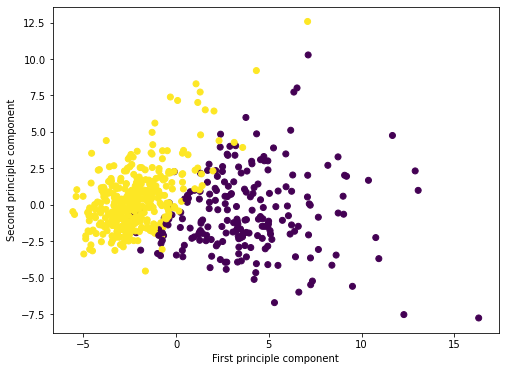

In [161]:
plt.figure(figsize=(8, 6)) # plt.figure object of size 8,6 is created
plt.scatter(x_pca[:,0], x_pca[:,1], c=cncr['target']) #scatter plot is successfuly created
plt.xlabel('First principle component') #label given to x-axis
plt.ylabel('Second principle component') #label given to y-axis

# Performing the PCA manually

In [103]:
# We will be using the scaled data

### Get the transpose

In [146]:
# performing the transpose
# data = (569, 30)
# transpose = (30, 569)
dataset_tr = scaled_data.transpose()

### Get the covariance matrix

In [152]:
# multiple the transposed and the data i.e. getting the covariance matrix w.r.t columns
# multiplication = (569, 569)
Z = np.matmul(dataset_tr, scaled_data)

In [158]:
Z.shape

(30, 30)

### Get the eigen vectors and eigen values

In [153]:
# getting the eigen  values of Z in the descending order of eigen values
eigenvalues = np.linalg.eigvals(Z)
eigenvalues

array([7.55723477e+03, 3.23838077e+03, 1.60341297e+03, 1.12698443e+03,
       9.38127682e+02, 6.86985912e+02, 3.84200245e+02, 2.71195153e+02,
       2.37213148e+02, 1.99544577e+02, 1.67238031e+02, 1.48600820e+02,
       1.37332415e+02, 8.93385328e+01, 5.35627951e+01, 4.54419337e+01,
       3.37980525e+01, 2.99400878e+01, 2.81527497e+01, 7.57025042e-02,
       4.26068962e-01, 9.04333249e-01, 3.92636394e+00, 4.65307708e+00,
       8.80884341e+00, 1.02732990e+01, 1.38499367e+01, 1.56130200e+01,
       1.77297000e+01, 1.70545766e+01])

In [154]:
# getting the eigen values and eigen vectors of Z in the descending order of eigen values
eigenvalues, eigenvectors = np.linalg.eig(Z)
eigenvectors.shape

(30, 30)

### Projection

In [155]:
# Projecting the original data on the eigen vectors
projected = np.matmul(scaled_data, eigenvectors)
projected.shape

(569, 30)

### 2 most important principle componets

Text(0, 0.5, 'Second principle component')

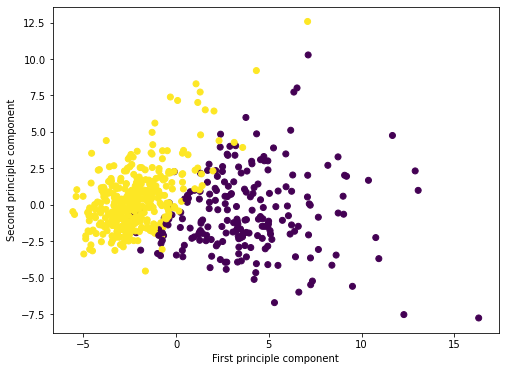

In [156]:
plt.figure(figsize=(8, 6))
plt.scatter(projected[:,0], projected[:,1], c=cncr['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

### Guideline:
##### Know about scaling the data manually
##### Know about significance of covariance, eigen values and eigen vectors
##### Know how to calculate eigen vectors and values manually
##### Know why projection achives the result

In [162]:
import lux

In [163]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         